In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

# Heat mapping class & functions

In [2]:
# create covid map object
class COVID_MAP:
    def __init__(self, heat_old, position_state, boundaries, xsize, ysize): 
        self.heat_old = heat_old
        self.position_state = position_state
        self.boundaries = boundaries
        self.xsize = xsize
        self.ysize = ysize
    
    def map_position_states(self):
        pos_map = np.zeros((self.xsize, self.ysize))
                           
        for x in self.position_state:
            pos_map[x[0],x[1]] = x[2]
            
        return pos_map
    
    def heat_source(self): # will add heat source to map based on individuals new position
        temp = 100
        sources = np.zeros((self.xsize,self.ysize))
        sources += self.map_position_states()
        sources[sources == 2] = temp 
        sources[sources != temp] = 0
        return sources
    
    def calculate_heat_new(self): # will calculate single step of heat dispersion
        
        heat_left = np.roll(self.heat_old, 1 , axis = 1)
        heat_right = np.roll(self.heat_old, -1 , axis = 1)
        heat_up = np.roll(self.heat_old, -1 , axis = 0)
        heat_down = np.roll(self.heat_old, 1 , axis = 0)
        
        heat_new = 0.25*(heat_left + heat_right + heat_up + heat_down) # cell heat is the average of adjacent cells
        heat_new = heat_new + self.heat_source()
        heat_new[heat_new > 100] = 100
        
        heat_new[:,0] = 0
        heat_new[:,-1] = 0
        heat_new[0,:] = 0
        heat_new[-1,:] = 0
        
        return heat_new
    
    def show_heatmap(self): # creates a heatmap
        # create marker for healthy individuals
        heat_map = self.calculate_heat_new()
        pos = self.map_position_states()
        heat_map[pos == 1] = -100
        sns.heatmap(heat_map, cbar=False, cmap='coolwarm', center =0).invert_yaxis()

# Position & movement function

In [3]:
def Move(position_state):
        movement = np.random.randint(-5, 6, size = (pop_size, 2))  # creates a random array of -5 to 5 to add to the current positions
        coords = position_state[:,0:2] + movement
        coords[coords < 0] = 0 # prevent movement below x and y axis
        coords[coords[:,0] > (xsize - 1)] = (xsize - 1) # prevent movement beyond x axis
        coords[coords[:,1] > (ysize - 1)] = (ysize - 1) # prevent movement beyond y axis
        position_state[:,0:2] = coords
        return position_state

# Transmission function

In [4]:
def Transmission(position_state, heat):
    for x in range(len(position_state)):
            if heat[position_state[x,0],position_state[x,1]] > 20 and heat[position_state[x,0],position_state[x,1]] > np.random.randint(0,101):
                position_state[x,2] = 2
    return position_state

# Create initial map parameters

In [5]:
# starting conditions
xsize = 500  # number of cell or pixels in the xaxis
ysize = 500  # number of cells or pixels in the yaxis
heat = np.zeros((xsize,ysize)) # heat map array, currently all cold
boundary = np.zeros((xsize,ysize)) # boundary array, will have values where there are boundaries, values can dictate behaviour

# Create initial list of individuals

In [6]:
pop_size = 400 # total number of individuals

x_pos = np.random.randint(0,xsize, size=(pop_size,1))  # random x coordinates in column vector
y_pos = np.random.randint(0,ysize, size=(pop_size,1))  # random y coordinates in column vector
state = np.zeros((pop_size,1))
random_states = [1, 2]  # 1 means healthy, 2 means infectious
weights = [96, 4] # lists the states and weightings
state = np.transpose([np.array(random.choices(random_states, weights=weights, k=pop_size))]) #randomly picks state using weighting probability, convert to column vector
position_state = np.hstack((x_pos, y_pos, state)) # horizontal stack into 1 array

# Create map instance

In [7]:
#create map instance
map1 = COVID_MAP(heat, position_state, boundary, xsize, ysize)

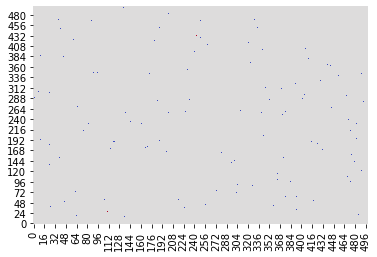

In [8]:
map1.show_heatmap() # show initial heatmap

# Iterate map1 instance 100 times

In [9]:
i = 0   # total iteration counter

Total Infected:  396
Total Population:  400
Iterations:  1200


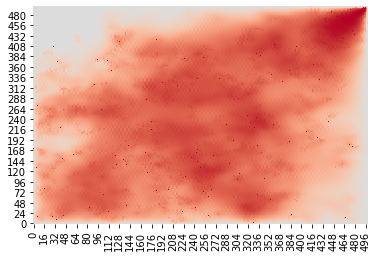

In [21]:
n = 0  # throwaway iterator
while n<100:
    Transmission(position_state, heat)
    heat = map1.calculate_heat_new()
    Move(position_state)
    map1 = COVID_MAP(heat, position_state, boundary, xsize, ysize)
    
    i += 1
    n += 1
map1.show_heatmap()
print("Total Infected: ",np.count_nonzero(position_state[:,2] == 2))
print("Total Population: ", pop_size)
print("Iterations: ", i)